# Final Project

## Nhi Nguyen 76164237

## Task 1: Loading the data

We can use programs like Pandas in order to read the given dataset and load it here so it can be worked on. The data has already been split into two categories: train and test. I first create different models in order to work with the data, and the training set is purposely used to train the models, in order for it to make accurate predictions. The test data set will then be used and tested on, to show performances of these models.

In [13]:
import pandas as pd
import numpy as np

folder_dir = '../input/finals-datasets/'

train_data = np.load (folder_dir+'mnist_train.npz')
test_data = np.load (folder_dir+'mnist_test.npz')
X_train = train_data['X']
y_train = train_data['y']
X_test = test_data['X']
y_test = test_data['y']

In [2]:
print(X_train.shape)
print(y_train.shape) # This is the dimensions of our train data set
print(X_test.shape)
print(y_test.shape) # This is the dimensions of our test data set

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Task 2: Logistic Regression

**Logistic Regression** is a technique used to analyze a data set, which has a dependent variable and one or more independent variables to predict the outcome. The dependent variable is also called the target variable, it is the outcome that we are predicting through training and testing it. It predicts the probablity of an event.

In [20]:
    """ Logistic Regression classifier """
    
    def __init__(self, learning_rate=.001, opt_method = 'SGD', num_epochs = 15, size_batch = 20):
        """ Introduces parameters needed """
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch        

    def fit(self, data, y, n_iterations = 1000):
        """ Determine the optimal parameters needed for input data X and y """

        self.K = max(y)+1
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) # initialize beta, can be other choices
        
        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dW = self.loss_gradient(W,X,y) # write another function to compute gradient
                W = W - eta * dW # the formula of GD
            # this step is optional -- just for inspection purposes
                if k % 500 == 0: # print loss every 500 steps
                    print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N)
                for m in range(0,N,size_batch):
                    i = shuffle_index[m:m+size_batch]
                    dW = self.loss_gradient(W,X[i,:],y[i])
                    W = W - eta * dW
                    
                    if e % 1 == 0 and num_iter % 50 == 0:
                        print("loss after", e+1, "epochs and ", num_iter+1, "iteration is: ", self.loss(W,X,y))
                    num_iter = num_iter + 1
        
        self.coeff = W
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        ''' Calculates rate of correct predictions '''
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W):
        ''' Calculates the predicted probability distribution '''
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        ''' Calculates loss from loss function'''
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        ''' Calculates gradient of L (loss function) '''
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [21]:
lg = myLogisticRegression(learning_rate=1e-4)
lg.fit(X_train,y_train,n_iterations = 20000)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

The Fit data in this class takes a large percentage of the data set in order to train the data, in order for it to predict different outcomes of y on the training and on the test data.

In [22]:
lg.score(X_train,y_train)

AttributeError: 'myLogisticRegression' object has no attribute 'coeff'

The Score function within **Logistic Regression** shows the rate of correct predictions that are made based on the data, after it has been trained through the Fit function

## Task 3: PCA

Given high-dimensional data observation $\mathbf{x}\in\mathbb{R}^{1\times p}$ (imagine it as one sample), find a "reasonable" projection function $$\mathbf{t}=\mathbf{h}(\mathbf{x}): \mathbb{R}^{1\times p}\to\mathbb{R}^{1\times k},k<<p$$ that "preserves" the high-dimensional information.

- A naive solution is to randomly pick $k$ component of $\mathbf{x}$-- of course there is huge waste of information.
- Another simple yet reasonable assumption is that $\mathbf{h}$ is linear transformation -- of course, the linear coefficients should depend on the "structure" of dataset. In other words, the "new coordinates" are the linear combination of "old coordinates". $$\mathbf{t}=\mathbf{h}(\mathbf{x})=\mathbf{x}\mathbf{V}_{k}, \mathbf{V}_{k}\in\mathbb{R}^{p\times k}.$$ In data matrix form (n samples), we have $$\mathbf{T}_{k}=\mathbf{X}\mathbf{V}_{k}\in\mathbb{R}^{n\times k}$$

**PCA**, also known as **Principle Component Analysis** is one of these methods, used to reduce the dimensions of large data sets by reducing a large set of variables into smaller one that still contains most of the information stored within the data set. However, reducing the number of variables risks some of the accuracy of the data set. Despite this, this method is used nonetheless because simpler data are easier to analyze and are easier to explore and visualize.

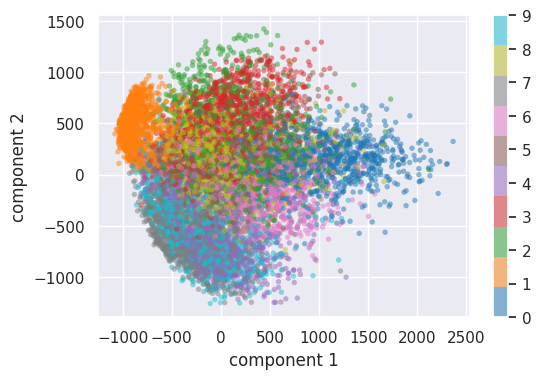

In [5]:
import numpy as np

class myPCA():
    '"write your document strings here"'
    
    def __init__(self, n_components = 2):
        '"Introduce the components needed for this Reduction "'
        self.n_c = n_components
    
    
    def fit(self,X):
        '" Optimize the parameters needed for input X variable from test data"'
        cov_mat = np.cov(X.T) # covariance matrix, the input matrix to this function does not need to be centered
        eig_val, eig_vec = np.linalg.eigh(cov_mat) #eigen-values and orthogonal eigen-vectors --ascending order
        eig_val = np.flip(eig_val) # reverse the order --descending
        eig_vec = np.flip(eig_vec,axis=1) # reverse the order
        self.eig_values = eig_val[:self.n_c] # select the top eigen-vals
        self.principle_components = eig_vec[:,:self.n_c] # select the top eigen-vecs
        self.variance_ratio = self.eig_values/eig_val.sum() # variance explained by each PC
    
    def transform(self,X):
        '" Project the data on PCs "'
        return np.matmul(X-X.mean(axis = 0),self.principle_components)

pca = myPCA(n_components = 15)
pca.fit(X_test)
X_pca = pca.transform(X_test)


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.colorbar();

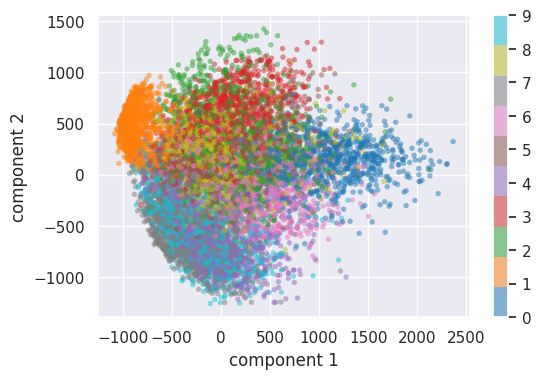

In [6]:
from sklearn.decomposition import PCA
pca_sklearn = PCA(n_components=2)
projected = pca_sklearn.fit_transform(X_test)

figure = plt.figure(dpi=100)
plt.scatter(projected[:, 0], projected[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 4: Supervised method: kNN (k-nearest neighbor classifier)

To make a prediction of test sample, we don't have to always derive the mapping formula explicitly -- we just look at its "close friends" in training dataset, and follow its friends' label! Do as what your neighbors do.

Given a test sample $\mathbf{x}$ from **test** dataset, the kNN classifier  identifies the neighbors $k$ points in the **training** data that are closest to $\mathbf{x}$, which is represented by $\mathcal{N}_{x}$. It then estimates the probability that $\mathbf{x}$ belongs to class $j$ by $P\big(y= j| \mathbf{x} \big)$ computing the fraction of points in $\mathcal{N}$ whose label(s) actually equal $j$:

$$
P\big(y= j| \mathbf{x} \big)\approx  \frac{1}{k} \sum_{i\in \mathcal{N}_{x}} 1\{ y^{(i)} = j\}.
$$

We finally determine its class by picking up the class with largest probability.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 20)
knn_clf.fit(X_train, y_train)
knn_clf.score (X_test, y_test)

0.9625

In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,10))
# creating dataframe of cv scores and test scores -- of course you can also use Numpy array
cv_scores = pd.DataFrame()
test_scores = pd.Series(dtype = 'float64')

# perform 10-fold cross validation
for k in k_list:
    knn_clf.set_params(n_neighbors=k) # update the object
    scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores["K="+str(k)] = scores
    test_scores[str(k)] = knn_clf.score(X_test,y_test)

## Unsupervised method: K-means Clustering

**Unsupervised** learning methods are used to make inferences from datasets using only input vectors and doesn't refer to known outcomes. **PCA** (used above) was an unsupervised method, and so is this one. **K-means Clustering** is a method used to identify the number of centers within clusters of datasets, and the *means* in K-means refers to the average of the data, focused on finding the centers of these clusters. It does this by randomly selecting points within clusters, and performs repetitive calculations in order to optimize the positions of these centers.

Below, I've used this method in order to simplify the data set and idendify certain simple points within this data, in order to learn about the data set.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3, random_state = 0)
y_km = kmeans.fit_predict(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))
ax1.set_title('K-means Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

The graphs above shows the function of K-means methods, in comparison to the complicated data set that was given. The general area of points are matched pretty closely, and the centers of the clusters are identify. As shown, k-means, in simplifying the data, decreased its accuract and not all of the information about the classes of this data set was shown.

Compared to **PCA**, **K-means**, the number of data points significantly decreases, as shown clearly by the distinct separation of the clusters as well as less class was represented. It reduces the noise within the data. 

## Task 5: cuML

**cuML** is a different software that contains different methods that have already been used. In this case, I used cuML to do Logistic Regression with the existing data

In [17]:
%%time
from cuml import LogisticRegression
clf_cuml = LogisticRegression()
clf_cuml.fit(X_train,y_train)
clf_cuml.score(X_test,y_test)

[W] [03:38:35.643364] L-BFGS: max iterations reached
CPU times: user 3.75 s, sys: 32.5 ms, total: 3.78 s
Wall time: 3.78 s


0.9218000173568726

**Scikit-learn** is another software that contains many different methods that you can use. I utilized Logistic Regression from this program as well to compare the two

In [18]:
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

CPU times: user 53.2 s, sys: 3.72 s, total: 56.9 s
Wall time: 30.2 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9255

Comparing **Scikit-learn** to **cuML**, there are pros and cons of each package. In terms of time, cuML clearly wins, as it was able to execute the code in 3.78 seconds, while it took Scikit-learn around 57 seconds. Despite this, Scikit-learn's data predictions are more accurate, with a 0.9255 compared to cuML, with 0.9218, but it really was not that far off considering the size of the data. However, cuML's score gave more details, and I prefer this package over Scikit-learn for Logistic Regression.